# Week 3 Project Based Virtual Internship Data Science at ID/X Partners
This Challenge is about developing a logistic regression model (classification) to predict wether the clients will take the long term loan or not.<br>
The dataset and the challenge is provided by my mentor **[Mr. Louis Madaerdo Sotarjua](https://www.linkedin.com/in/louismadaerdo/)**<br><br>

Author : **Azarya Yehezkiel Pinondang Sipahutar**

## Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


warnings.filterwarnings('ignore')

## Load data & Data Understanding

In [83]:
df = pd.read_csv('../data/new_train.csv')

print(f'Data has {df.shape[0]} rows and {df.shape[1]} columns')
print('\nData Sample:')
display(df.sample(3))

missing = df.isna().sum().sum()
print('\nMissing Values:', missing)

Data has 32950 rows and 16 columns

Data Sample:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
2740,39,entrepreneur,married,high.school,no,no,no,telephone,jun,tue,135,6,999,0,nonexistent,no
12446,36,technician,married,professional.course,no,yes,no,telephone,may,mon,188,2,999,0,nonexistent,no
23438,31,admin.,single,university.degree,no,no,no,cellular,aug,mon,121,1,999,0,nonexistent,no



Missing Values: 0


In [84]:
# change the target column name from y to term_deposit
df['term_deposit'] = df['y']
df.drop('y', axis=1, inplace=True)

The data contains 32950 rows and 16 columns, and the data don't have any missing values. The data contains the following columns:
| Column Name | Description |
|-------------|-------------|
| age         | Age of the client |
| job         | Type of job |
| marital     | Marital status |
| education   | Last client level of education |
| default     | Has credit in default? |
| housing     | Has a housing loan? |
| loan        | Has a personal loan? |
| contact     | Contact communication type |
| month       | Last contact month of year |
| day_of_week | Last contact day of the week |
| duration    | Last contact duration, in seconds |
| campaign    | Number of contacts performed during this campaign and for this client |
| pdays       | Number of days that passed by after the client was last contacted from a previous campaign |
| previous    | Number of contacts performed before this campaign and for this client |
| poutcome    | Outcome of the previous marketing campaign |
| term_deposit           | Has the client subscribed a term deposit? |

## Exploratory Data Analysis

### Stastical Summary
now we want to see the statistical summary of numerical data and categorical data

#### Numerical Data

In [85]:
numeric = df.select_dtypes(exclude='object')
print('Numerical summary:')
display(numeric.describe())

Numerical summary:


,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Summary findings from statistical summary of numerical data:
- **Age**:  The average age of the clients is 40 years old while the median age is 38, wich is slightly less than the mean, indicating a slight skew to the right, and with a minimum age of 17 and a maximum age of 98.

- **Duration**: The average duration of the last contact is 258 seconds while the median duration is 180 seconds, indicating a slight skew to the right, and with a minimum duration of 0 seconds and a maximum duration of 4918 seconds.

- **Campaign**: The average number of contacts performed during this campaign for a client is 2.56 while the median is 2, wich is slightly less than the mean, indicating a slight skew to the right, and with a minimum number of contacts is 1 and the maximum is 56.

- **Pdays**: The average number of days that passed by after the client was last contacted from a previous campaign is approximately 962.05 while the median is 999, indicating a slight skew to the left, and with a minimum number of days is 0 and the maximum is 999.

- **Previous**: The minimum number of contacts is 0 and the maximum is 7, and this column has 8 unique values, indicating that the column supposed to be a categorical column, so i will change this column to a categorical column to see the summary of this column.

#### Categorical Data

In [86]:
df['previous'] = df['previous'].astype('object')
categoric = df.select_dtypes(include='object')
print('Categorical summary:') 
display(categoric.describe())

Categorical summary:


,job,marital,education,default,housing,loan,contact,month,day_of_week,previous,poutcome,term_deposit
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,8,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,0,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,28416,29238


Summary findings from statistical summary of categorical data:
- **Job**: The most common job is admin with 8314 clients, this column has 12 unique values.
- **Marital**: The most common marital status is married with 19923 clients, this column has 4 unique values.
- **Education**: The most common education level is university degree with 9736 clients, this column has 8 unique values.
- **Default**: The most common value is no with 26007 clients, this column has 2 unique values.
- **Housing**: The most common value is yes with 17254 clients, this column has 2 unique values.
- **Loan**: The most common value is no with 27131 clients, this column has 2 unique values.
- **Contact**: The most common contact communication type is cellular with 20908 clients, this column has 2 unique values.
- **Month**: The most common month is may with 11011 clients, this column has 10 unique values.
- **Day_of_week**: The most common day of the week is thu with 6857 clients, this column has 5 unique values.
- **Poutcome**: The most common outcome of the previous marketing campaign is nonexistent with 28416 clients, this column has 3 unique values.
- **Y**: The most common value is no with 29238 clients, this column has 2 unique values.
- **Previous**: The most common value is 0 with 28416 clients not previously contacted, this column has 8 unique values. The modus value of this column is pretty high (86%) compared to the other values.

### Brief Data Visualization

#### Numerical Data

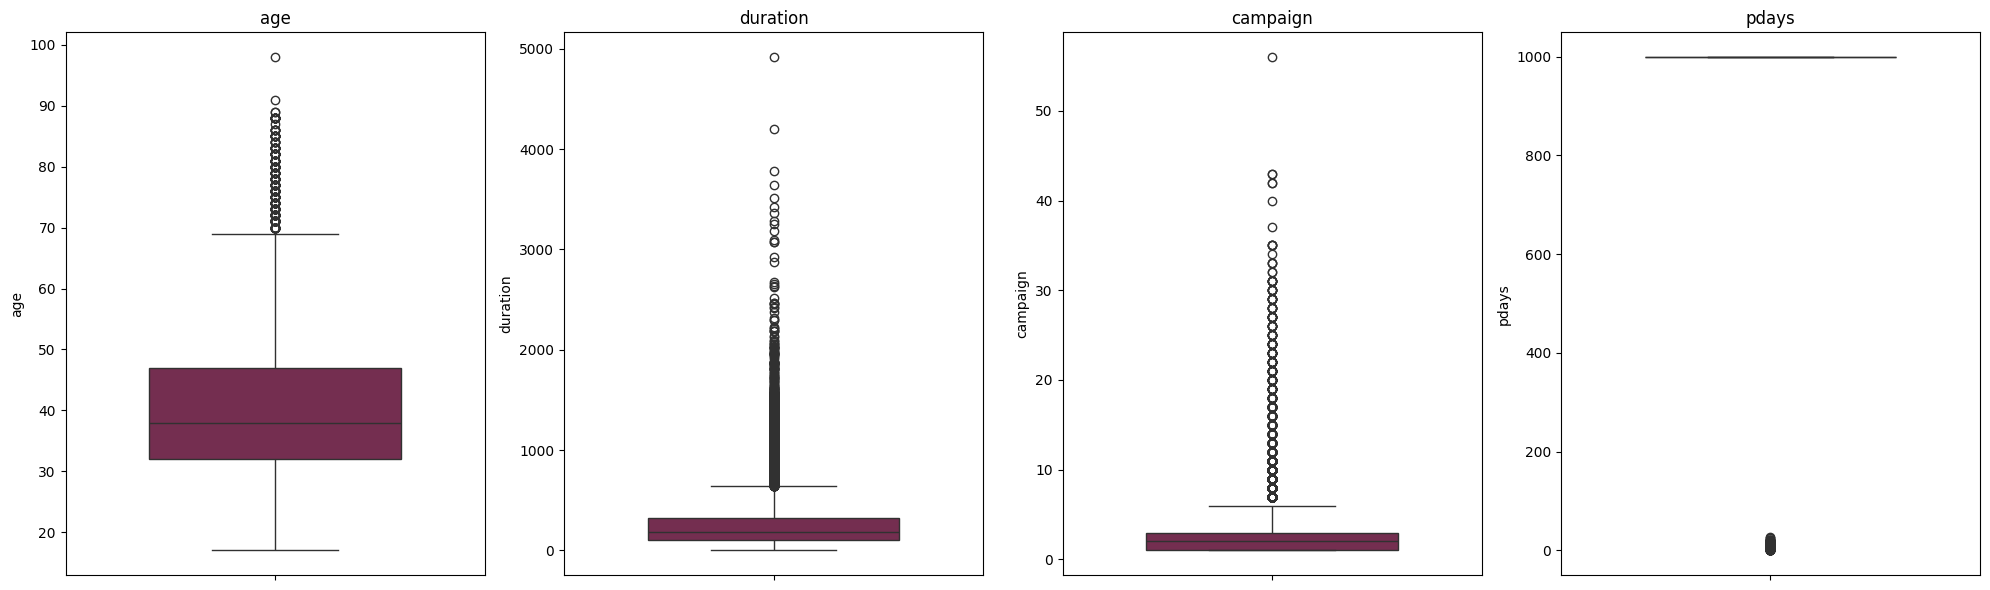

In [87]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))
# axes = axes.flatten()
numerics = numeric.drop(columns='previous')

for i, column in enumerate(numerics.columns):
    sns.boxplot(df[column], ax=axes[i], color='#7f2350', orient='v', width=0.6)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

The numerical data contains outliers, i will use the IQR method to detect and cap the outliers to the upper and lower bounds. 

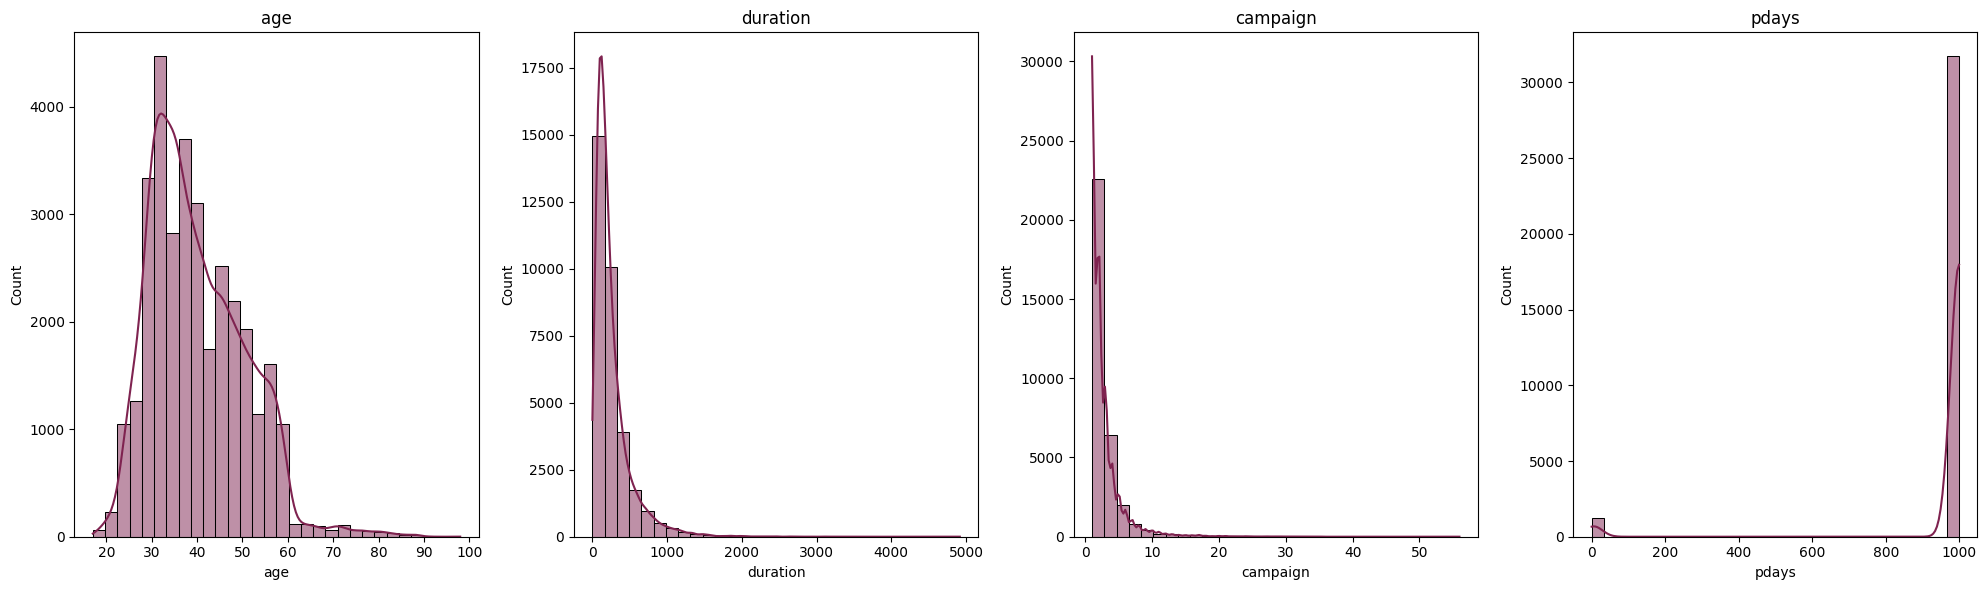

In [88]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i, column in enumerate(numerics.columns):
    sns.histplot(df[column], ax=axes[i], color='#7f2350', kde=True, bins=30)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

3 of the numerical data(`age`, `duration`, `campaign`) positively skewed, i will normalize the data later in the preprocessing step. for pdays column the values are mostlly 999, thats why the distribution is pretty weird. 

#### Categorical Data

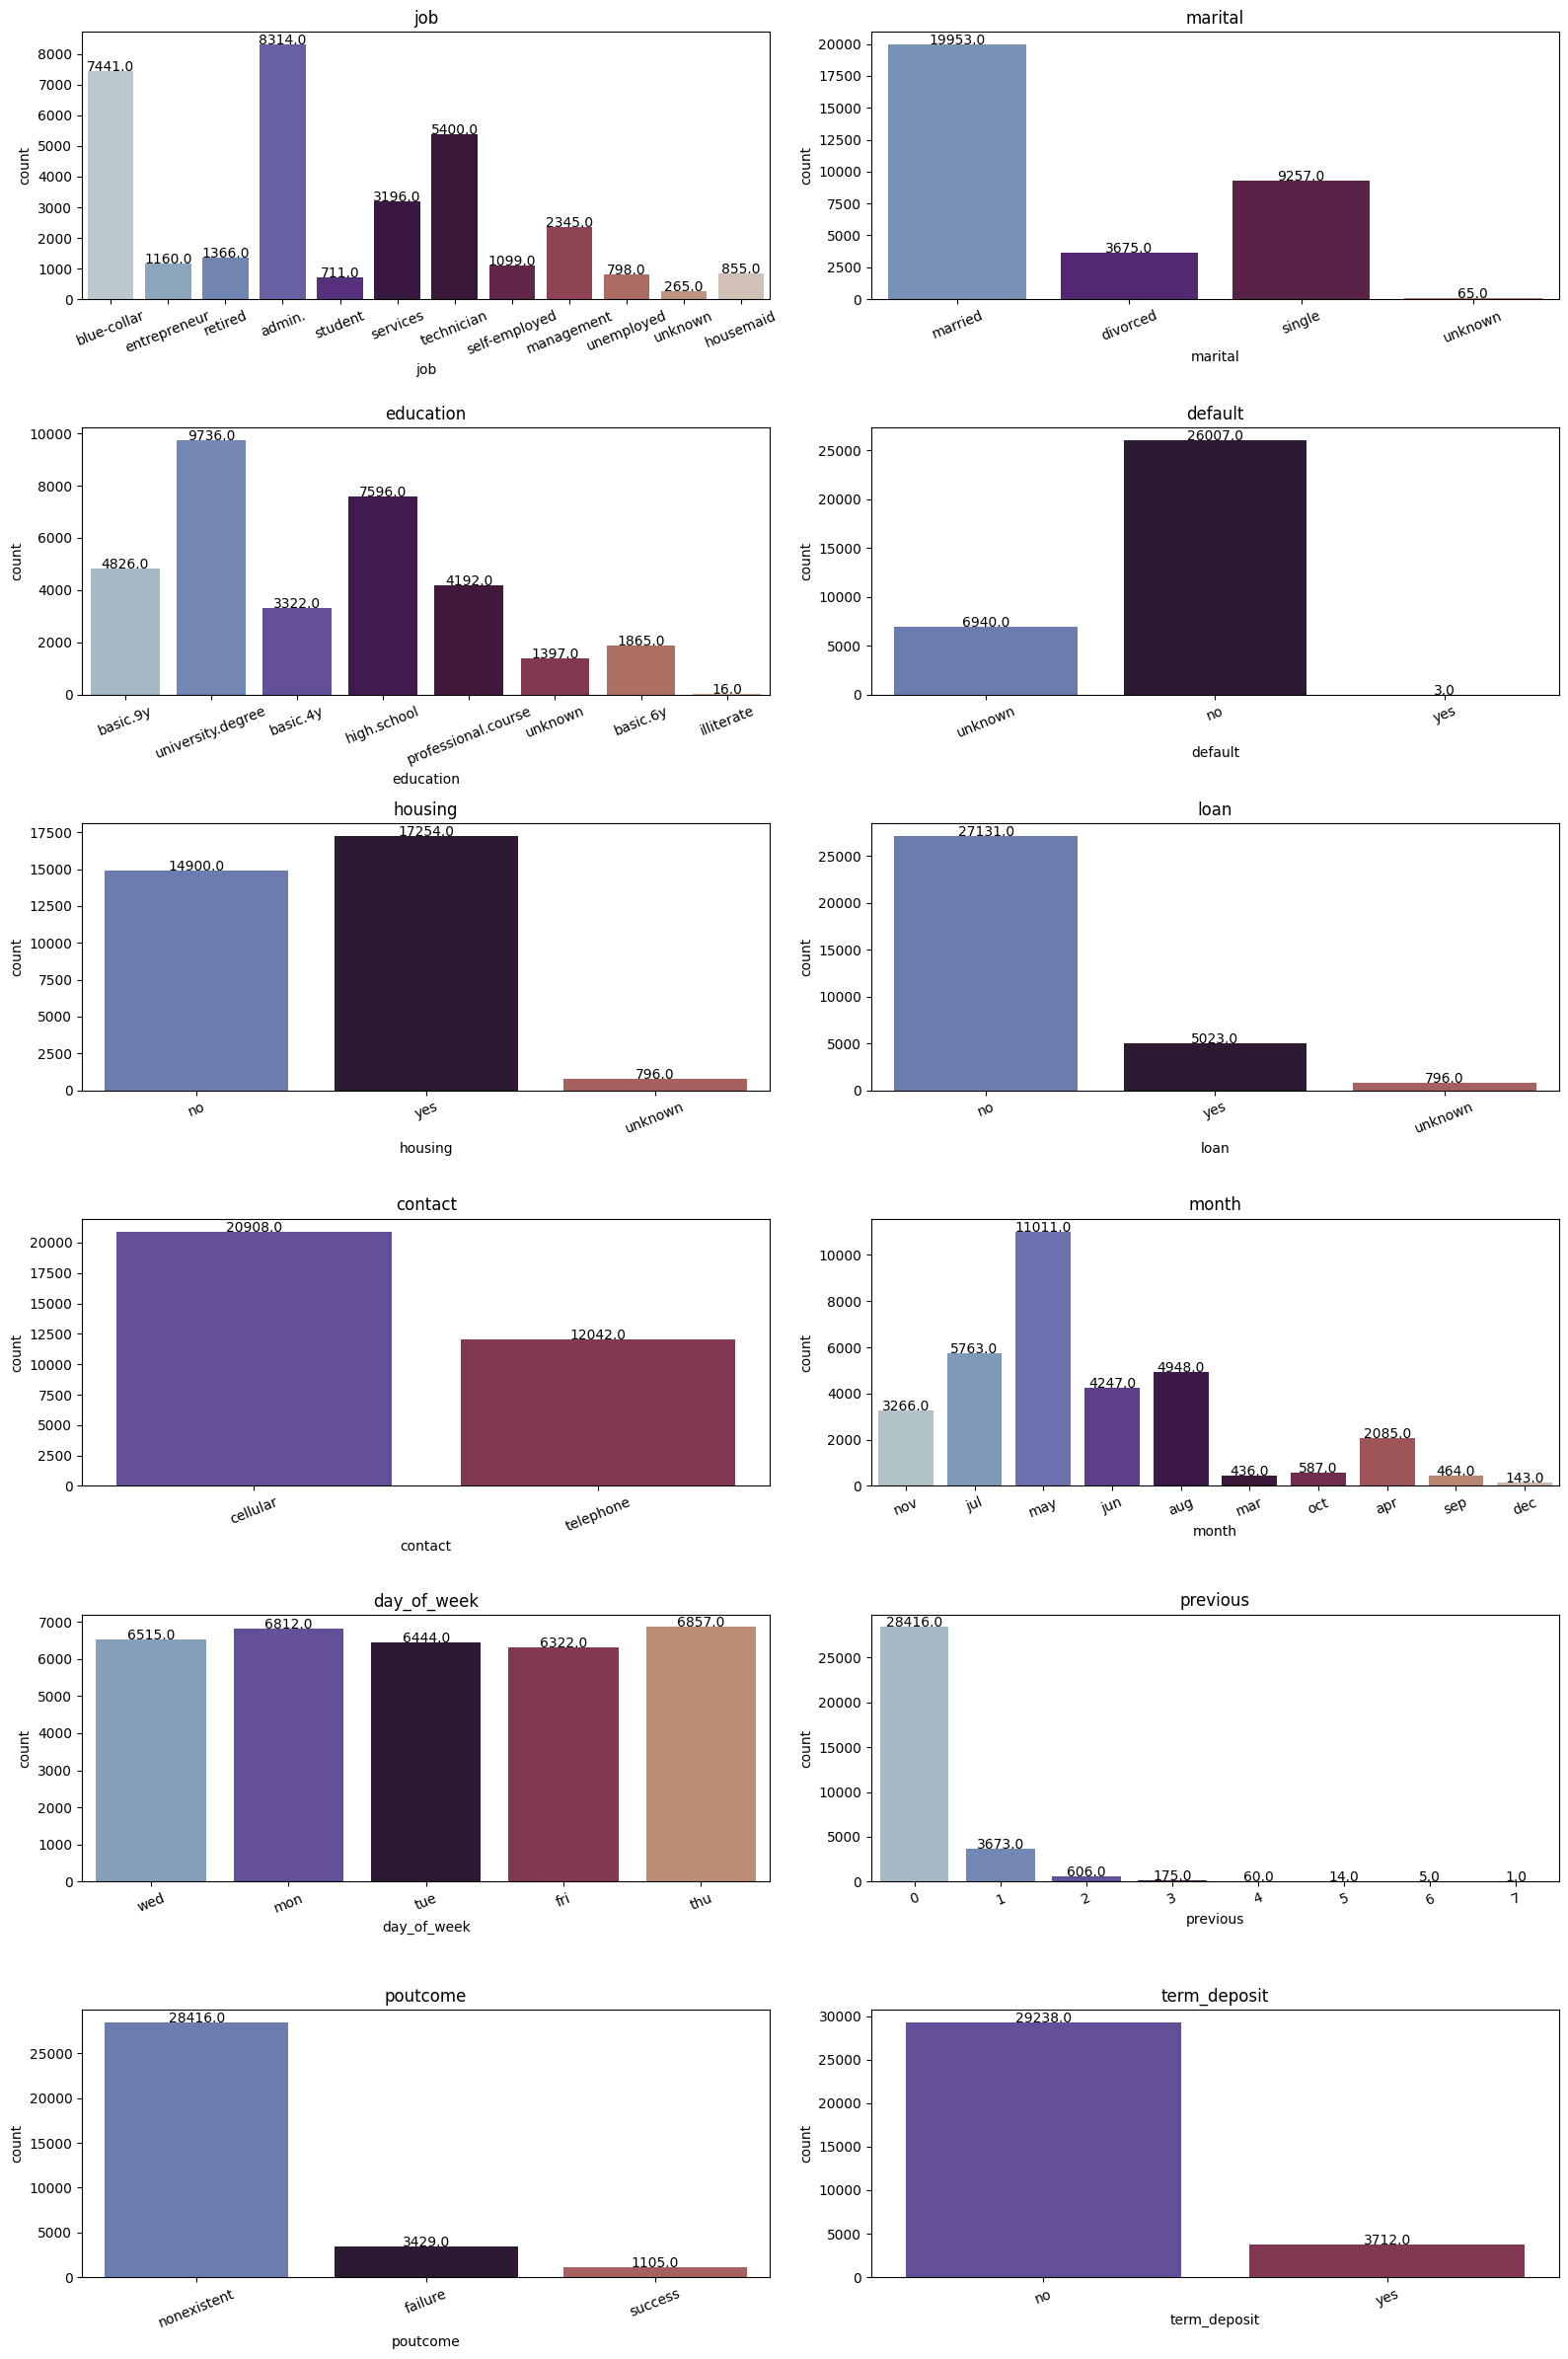

In [89]:
# Create for loop to plot countplot for each categorical column
fig, axes = plt.subplots(6, 2, figsize=(16, 24))

for i, column in enumerate(categoric.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(x=df[column], ax=ax, palette='twilight')
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=22)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height,
            '{}'.format(height), ha='center')

plt.tight_layout()
plt.show()

as said before on the statistical analysis, there's some of the values of the column are pretty high compared to the other values, and also there's some unknown value in the data, for example the `default` column has value no, yes, and unknown, the no value is dominating, yes value is too small, and the unknown value is medium, because i think this is less informative i will drop this column later in the preprocessing step.

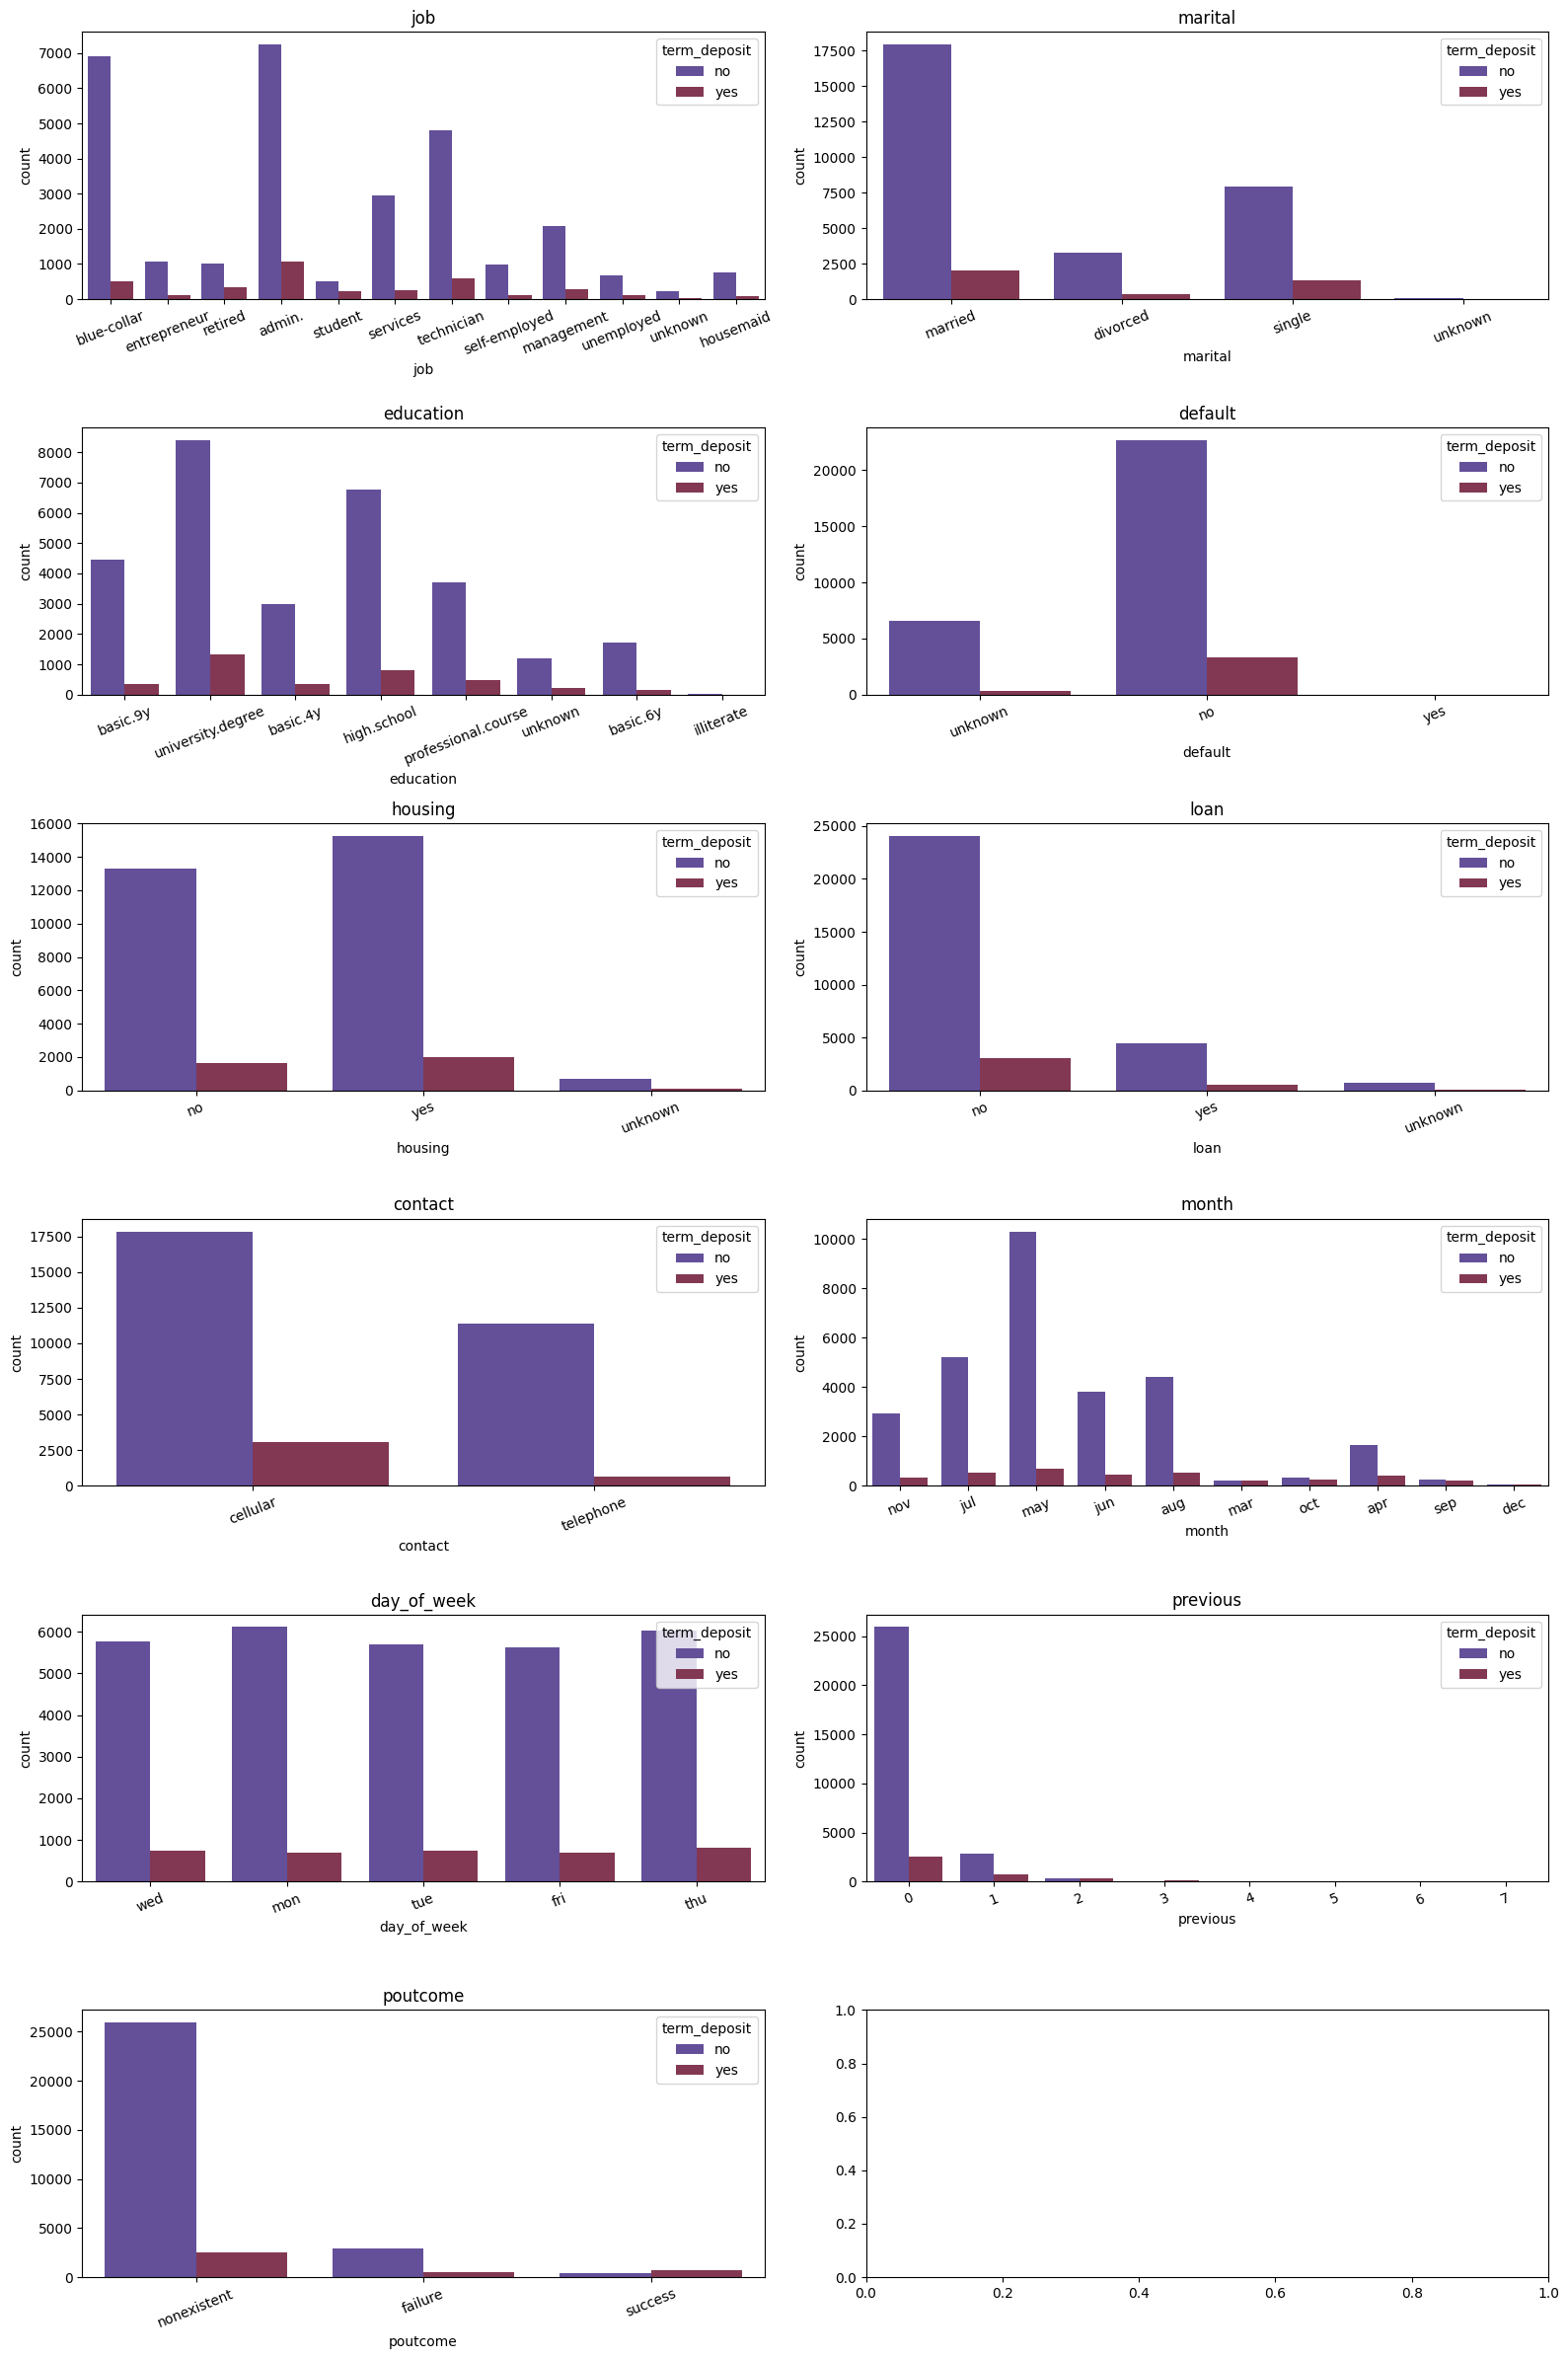

In [90]:
# Create for loop to plot countplot for each categorical column
fig, axes = plt.subplots(6, 2, figsize=(16, 24))

categorics = categoric.drop(columns='term_deposit')
for i, column in enumerate(categorics.columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=df[column], ax=axes[row, col], data=df, palette='twilight', hue='term_deposit')
    axes[row, col].set_title(column)
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=22)

plt.tight_layout()
plt.show()

### Data Preprocessing

#### Feature Engineering

#### Feature Creation

In [91]:
# Create a new column 'recently_contacted' based on the 'pdays' column. If 'pdays' is 999, set 'recently_contacted' to 0, else set it to 1.
df['recently_contacted'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Drop the 'pdays' column as it's no longer needed
df.drop('pdays', axis=1, inplace=True)

# Convert the 'previous' column to integer again to bin it
df['previous'] = df['previous'].astype(int)
# Create a new column 'previously_contacted' based on the 'previous' column. If 'previous' is greater than 0, set 'previously_contacted' to 'contacted', else set it to 'not contacted'.
df['previously_contacted'] = df['previous'].apply(lambda x: 'contacted' if x > 0 else 'not contacted')

# Drop the 'previous' column as it's no longer needed
df.drop('previous', axis=1, inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   32950 non-null  int64 
 1   job                   32950 non-null  object
 2   marital               32950 non-null  object
 3   education             32950 non-null  object
 4   default               32950 non-null  object
 5   housing               32950 non-null  object
 6   loan                  32950 non-null  object
 7   contact               32950 non-null  object
 8   month                 32950 non-null  object
 9   day_of_week           32950 non-null  object
 10  duration              32950 non-null  int64 
 11  campaign              32950 non-null  int64 
 12  poutcome              32950 non-null  object
 13  term_deposit          32950 non-null  object
 14  recently_contacted    32950 non-null  int64 
 15  previously_contacted  32950 non-null

##### Binning Categorical data

In [93]:
# Mapping job titles to broader categories
mapjob = {
    'student': 'unemployed',  
    'retired': 'unemployed',  
    'unknown': 'unemployed',  
    'entrepreneur': 'self-employed',  
    'housemaid': 'services', 
}

# Replace the job titles in the training and test datasets
df['job'] = df['job'].replace(mapjob)

# Mapping education levels to broader categories
mapedu = {
    'basic.9y': 'basic education',  
    'basic.6y': 'basic education',  
    'basic.4y': 'basic education', 
    'unknown': 'other',  
    'illiterate': 'other'  
}

# Replace the education levels in the training and test datasets
df['education'] = df['education'].replace(mapedu)
df['education'] = df['education'].replace(mapedu)

# Columns where 'unknown' values are to be removed
unknown_col = ['marital', 'housing', 'loan']

# Loop through the columns and remove rows with 'unknown' values
for col in unknown_col:
    df = df[df[col] != 'unknown']
    
# Drop the 'default' column from the training and test datasets
df = df.drop(columns='default', axis=1)

#### Train Test Split

In [94]:
# Drop the 'term_deposit' column from the dataframe and assign the remaining columns to X. This will be our feature set.
X = df.drop(columns='term_deposit', axis=1)

# Assign the 'term_deposit' column to y. This will be our target variable.
y = df['term_deposit']

# Split the dataset into training and test sets. 75% of the data will be used for training and 25% for testing. The 'random_state' parameter ensures reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1103)

# Print the number of rows and columns in the training set
print(f'Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns')

# Print the number of rows and columns in the test set
print(f'Test set has {X_test.shape[0]} rows and {X_test.shape[1]} columns')

Training set has 24067 rows and 14 columns
Test set has 8023 rows and 14 columns


#### Handling Outlier

In [95]:
# Define a function to handle outliers in a DataFrame using the capping method
def cap_outliers(data, cols):
    """
    This function caps the outliers in the specified columns of a DataFrame.
    
    Parameters:
    data (DataFrame): The DataFrame to process.
    cols (list): A list of column names to cap outliers in.
    
    Returns:
    DataFrame: The processed DataFrame with outliers capped.
    """
    # Loop over each specified column
    for col in cols:
        # Calculate the first quartile (Q1)
        Q1 = data[col].quantile(0.25)
        # Calculate the third quartile (Q3)
        Q3 = data[col].quantile(0.75)
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Calculate the lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        # Calculate the upper bound for outliers
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers in the column by replacing them with the lower or upper bound
        data[col] = data[col].clip(lower_bound, upper_bound)
    
    # Return the processed DataFrame
    return data

# define columns to cap outliers in
outliers = X_train[['age', 'duration', 'campaign']]

# Apply the cap_outliers function to the DataFrame 'df', capping outliers in all numeric columns
X_capped = cap_outliers(X_train, outliers.columns)

##### Feature Selection

Based on my experiment, doing feature selection reduce the model performance.<br>
(Because the data majority is categorical i've only done feature selection with chi squeate test)

In [96]:
# def chi_square_test(df, target, categorical_features):
#     """
#     This function performs a Chi-Square test of independence for each categorical feature 
#     in a DataFrame with respect to a categorical target.
    
#     Parameters:
#     df (DataFrame): The DataFrame to process.
#     target (str): The name of the target column.
#     categorical_features (list): A list of the names of the categorical feature columns.
    
#     Returns:
#     DataFrame: A DataFrame that contains the p-value of the Chi-Square test for each feature, 
#                sorted in ascending order.
#     """
#     # Create an empty DataFrame to store the results
#     results = pd.DataFrame(columns=['feature', 'p-value'])

#     # Perform the test for each categorical feature
#     for i, feature in enumerate(categorical_features):
#         # Create a contingency table
#         contingency_table = pd.crosstab(df[feature], df[target])

#         # Perform the Chi-Square test
#         _, p, _, _ = chi2_contingency(contingency_table)

#         # Add the results to the results DataFrame using loc
#         results.loc[i] = [feature, p]

#     # Return the results sorted by p-value
#     return results.sort_values('p-value')


# chi_train = pd.concat([X_capped, y_train], axis=1)

# chi_test = pd.concat([X_test, y_test], axis=1)

# Xcat = X_capped.select_dtypes(include='object').columns.tolist()

# # Perform the Chi-Square test for the categorical features in the training set
# chisq_train = chi_square_test(chi_train, 'term_deposit', Xcat)

# chisq_test = chi_square_test(chi_test, 'term_deposit', Xcat)

# display(chisq_train)
# display(chisq_test)

In [97]:
# # Set a significance level
# alpha = 0.05

# # Select the features where p-value is less than the significance level
# selected_features = chisq_train[chisq_train['p-value'] < alpha]['feature'].values

# # Select the features where p-value is less than the significance level
# selected_features_test = chisq_test[chisq_test['p-value'] < alpha]['feature'].values

# # Filter the training and test sets to include only the selected features
# X_train_selected = X_capped[selected_features]

# X_test_selected = X_test[selected_features_test]

# # Display the selected features
# print('Selected Features:')
# print(selected_features)
# print(selected_features_test)

##### Encoding Categorical Data

In [98]:
# X_capped.drop(columns=['month', 'day_of_week'], axis=1, inplace=True)
# X_test.drop(columns=['month', 'day_of_week'], axis=1, inplace=True)

In [99]:
encode_edu = {
    'other': 0,
    'basic education': 1,
    'high.school': 2,
    'professional.course': 3,
    'university.degree': 4
}

X_capped['education'] = X_capped['education'].map(encode_edu)
X_test['education'] = X_test['education'].map(encode_edu)

Xtr_encoded = pd.get_dummies(X_capped, drop_first=True).astype('int64')
Xts_encoded = pd.get_dummies(X_test, drop_first=True).astype('int64')

# encode ytrain and ytest
y_train = y_train.map({'no': 0, 'yes': 1})

y_test = y_test.map({'no': 0, 'yes': 1})

##### Feature Scaling

In [100]:
# Create a StandardScaler instance. StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
scaler = StandardScaler()

# Fit the StandardScaler instance on the training data. This computes the mean and std to be used for later scaling.
# Then transform the training data. This scales the data according to feature-wise mean and variance computed from the training data.
Xtr_scaled = scaler.fit_transform(Xtr_encoded)

# Convert the scaled training data (which is a numpy array) back to a pandas DataFrame and keep the original column names
Xtr_scaled = pd.DataFrame(Xtr_scaled, columns=Xtr_encoded.columns)

# Use the same scaler fitted on the training data to transform the test data. This ensures the same scaling is applied to both the training and test data.
Xts_scaled = scaler.transform(Xts_encoded)

#### Handle Imbalance Data

In [101]:
# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Fit the SMOTE instance to the data and resample the data
Xtr_resampled, ytr_resampled = smote.fit_resample(Xtr_scaled, y_train)

# Print the number of original and resampled data points
print('Original data points:', len(y_train))
print('Resampled data points:', len(ytr_resampled))

# Print the X resample and y resample shape
print(f'\n{Xtr_resampled.shape}')
print(ytr_resampled.shape)

Original data points: 24067
Resampled data points: 42618

(42618, 32)
(42618,)


Target is balanced with SMOTE

### Modelling

#### Define function to evaluate the model

In [102]:
def eval_model(model, X_train, y_train, X_test, y_test, thresshold):
    """
    This function fits the model on the training data and evaluates it on both the training and test data.
    It prints the AUC, recall, and F1 scores for both the training and test data.

    Parameters:
    model: The machine learning model to be evaluated.
    X_train: The feature data for training.
    y_train: The target data for training.
    X_test: The feature data for testing.
    y_test: The target data for testing.
    thresshold: The threshold for classifying a data point as positive.
    """
    
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict the probabilities of the positive class for the training data
    pred_train = model.predict_proba(X_train)[:, 1]
    # Predict the probabilities of the positive class for the test data
    pred_test = model.predict_proba(X_test)[:, 1]

    # Print the AUC score for the training data
    print('Train AUC:', roc_auc_score(y_train, pred_train))
    # Print the AUC score for the test data
    print('Test AUC:', roc_auc_score(y_test, pred_test))

    # Print the recall score for the training data
    print('Train Recall:', recall_score(y_train, pred_train > thresshold))
    # Print the recall score for the test data
    print('Test Recall:', recall_score(y_test, pred_test > thresshold))

    # Print the F1 score for the training data
    print('Train F1 Score:', f1_score(y_train, pred_train > thresshold))
    # Print the F1 score for the test data
    print('Test F1 Score:', f1_score(y_test, pred_test > thresshold))

#### Train and Evaluate Model

In [110]:
# Create a Logistic Regression model
lr = LogisticRegression(random_state=1103)

# evaluate the model
eval_model(lr, Xtr_resampled, ytr_resampled, Xts_scaled, y_test, 0.5)

Train AUC: 0.9225426148592897
Test AUC: 0.9081052843275274
Train Recall: 0.8654089821202309
Test Recall: 0.8253223915592028
Train F1 Score: 0.8549175957905473
Test F1 Score: 0.531521328803322


The Test AUC score of the model is 0.90, which is pretty good, and the model has a good performance in predicting the target variable.

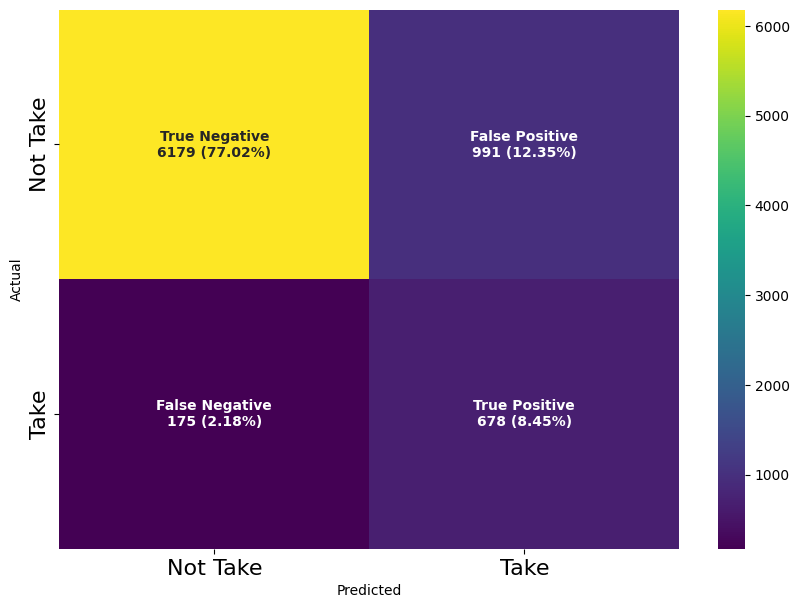

In [111]:
# Predict the probabilities of the positive class for the test data using the logistic regression model
pred_test = lr.predict_proba(Xts_scaled)[:, 1]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_test > 0.55)

# Calculate the percentage of each category
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Define the labels
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Create labels with both count and percentage
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix using a heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('white')  # Change figure color

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})
# plt.title('Confusion Matrix LightGBM Model', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Change label colors
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.xticks(ticks=[0.5, 1.5], labels=['Not Take', 'Take'], fontsize=16)
plt.yticks(ticks=[0.5, 1.5], labels=['Not Take', 'Take'], fontsize=16)
plt.show()

#### Tune Selected Model Hyperparameter for Enhance Model Performance

In [133]:
# logistic regression hyperparameter tuning

# Define the hyperparameters to search
hyperparameters = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': np.arange(100, 1000, 100),
}

# Create a RandomizedSearchCV object
lr_random_search = RandomizedSearchCV(lr, hyperparameters, n_iter=50, cv=5, scoring='roc_auc', random_state=11)

# Fit the RandomizedSearchCV object to the data
lr_random_search.fit(Xtr_resampled, ytr_resampled)

# Get the best hyperparameters from the search
best_params = lr_random_search.best_params_
print(best_params)

{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 400, 'C': 0.004832930238571752}


In [137]:
# Create a Logistic Regression model with the best hyperparameters
lr_best = LogisticRegression(**best_params, random_state=11)

# evaluate the model
eval_model(lr_best, Xtr_resampled, ytr_resampled, Xts_scaled, y_test, 0.5)

Train AUC: 0.9226753180505601
Test AUC: 0.9086562971610577
Train Recall: 0.8683185508470599
Test Recall: 0.8229777256740914
Train F1 Score: 0.8550172130958157
Test F1 Score: 0.5252525252525253


Seems like after random search the model performance is not improving, so i will use the default hyperparameter, a little bit.

In [136]:
# Create a Logistic Regression model with the best hyperparameters
lr_best = LogisticRegression(solver='liblinear', penalty='l2', max_iter=100, C=0.002, random_state=1103)

# evaluate the model
eval_model(lr_best, Xtr_resampled, ytr_resampled, Xts_scaled, y_test, 0.5)

Train AUC: 0.9225360168082575
Test AUC: 0.9089793836177508
Train Recall: 0.872964475104416
Test Recall: 0.8276670574443142
Train F1 Score: 0.8555397139309203
Test F1 Score: 0.5212255444813584


after manual tuning the C hyperparameter, the model performance slightly increase. wich means the model is already good enough.

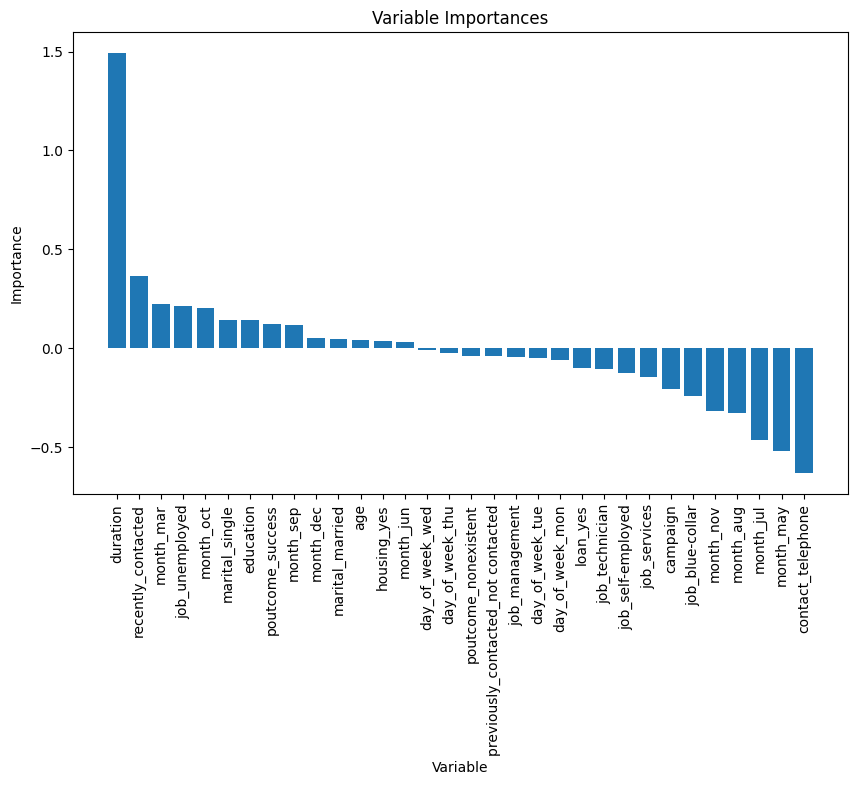

In [107]:
# Assume that 'model' is your fitted Logistic Regression model
feature_importance = lr_best.coef_[0]

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'feature': Xtr_resampled.columns, 'importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# list of x locations for plotting
x_values = list(range(len(feature_importance_df.importance)))

# set the size of the plot
plt.figure(figsize=(10, 6))

# Make a bar chart
plt.bar(x_values, feature_importance_df.importance, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_importance_df.feature, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Show the plot
plt.show()


Feature importance conclusion :<br>

- `duration` is the most influential feature predicting the target variable. A higher duration value increases the likelihood of the positive class.

- `recently_contacted` and `month_mar` are also significant positive predictors. This suggests that recently contacted customers and interactions in March have a higher likelihood of resulting in the positive class.

- `job_unemployes` and `month_oct` also have positive influences on the prediction.

- On the other hand, `contact_telephne`, `month_may`, `month_jul`, and `month_aug` are the most negatively influential features. This suggests that telephone contact and interactions in May, July, and August decrease the likelihood of the positive class.

- Other features like `job_blue-collar`, `campaign`, and `job_services` also negatively influence the prediction.

- Features with near zero imortance have little to no effect on the prediction. These include `day_of_wee_wed`, `day_of_week_thu`, `poutcome_nonexistent`, and previously_contacted_not_contacted`.